### 10-5. 단일표본 t-test:

당신은 매일 아침 동네 빵집에서 식빵을 구입해 왔다.

이 식빵의 무게는 500g이라고 표시되어 있다. 하지만 당신은 자신이 구매하는 빵이 500g이 맞는지 의구심이 들기 시작한다. 그래서 1개월간 식빵을 사운 뒤 매일 무게를 기록하였고 그 결과는 `bread` 데이터셋으로 저장하였다.

25일간 측정한 빵의 평균 무게는 480g이었다. 이 값을 가지고 식빵의 무게가 500g이 되지 않는다며 베이커리를 찾아가 컴플레인을 해야 할까?


In [1]:
from hossam import load_data

from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from math import sqrt

# 가설검정용 패키지:
from scipy.stats import t, ttest_1samp, normaltest

In [2]:
my_dpi = 200  # 이미지 선명도 (100~300)
font_path = r"\Users\itwill\OneDrive\문서\학원수업\NotoSansKR-Regular.ttf"  # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)      # 폰트 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname = font_path)    # 폰트 속성을 읽어옴
font_name = font_prop.get_name()    # 읽어온 속성에서 폰트의 이름만 추출

plt.rcParams['font.family'] = font_name # 그래프에 한글폰트 적용
plt.rcParams['font.size'] = 6          # 기본 폰트 크기
plt.rcParams['axes.unicode_minus'] = False  
    # 그래프에 마이너스 깨짐 방지 (한글 환경에선 필수)

In [3]:
origin = load_data('bread')
origin.head()

[data] https://data.hossam.kr/data/lab10/bread.xlsx
[desc] 매일 아침 동네 빵집에서 식빵을 구입해 무게를 기록한 데이터
[!] Cannot read metadata


,무게
0,482
1,479
2,485
3,474
4,479


C:\Users\itwill\AppData\Local\Temp\ipykernel_25396\2919330085.py:22: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')


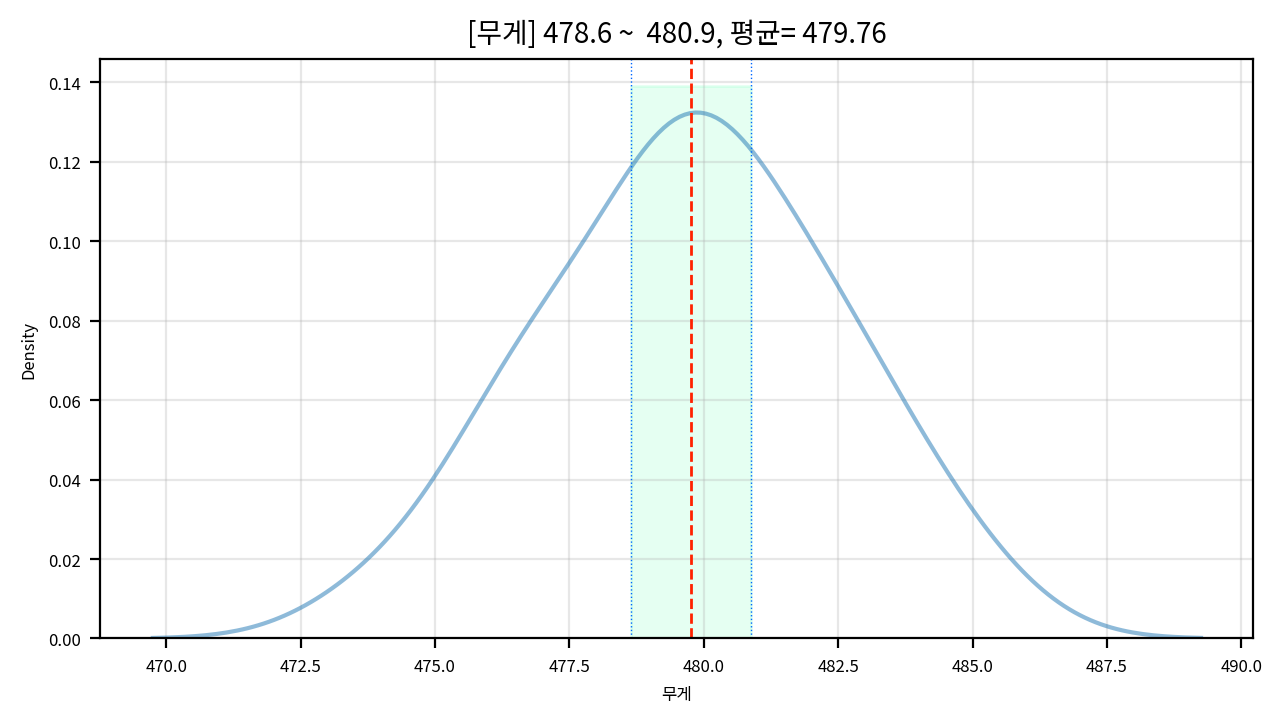

In [5]:
data = origin['무게']                   # 확인할 데이터 (컬럼단위)
max = data.max()                        # 최대값
dof = len(data) - 1                     # 자유도
clevel = 0.95                           # 신뢰수준
sp_mean = data.mean()                   # 표본평균
sp_std = data.std() # default: ddof=1   # 표본표준편차
sp_std_error = sp_std / sqrt(len(data)) # 표본표준오차

# 신뢰구간
cmin, cmax = t.interval(clevel, dof, loc = sp_mean, 
                        scale = sp_std_error)

# 1) 그래프 초기화 (초기설정, 캔버스(fig)랑 도화지(ax) 준비하기)
width_px = 1280             # 그래프 가로 크기
height_px = 720             # 그래프 세로 크기
rows = 1                    # 그래프 행 수
cols = 1                    # 그래프 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

# 2) KDE plot 그리기:
sb.kdeplot(data=data, fill=False, alpha=0.5, palette='pastel')

# 2-1) 신뢰구간 범위 (cmin ~ cmax) 그리기:
ax.axvline(cmin, linestyle=":", color='#0066ff', linewidth=0.5)
ax.axvline(cmax, linestyle=":", color='#0066ff', linewidth=0.5)

# 2-2) 현재 축 범위 가져오기:
ymin, ymax = ax.get_ylim()
ax.fill_between([cmin, cmax], 0, ymax, alpha=0.1, color='#00ff88')

# 2-3) 평균 표시:
ax.axvline(sp_mean, linestyle="--", color='#ff2200', linewidth=1)

# 3) 그래프 꾸미기: 
ax.set_title(f"[{data.name}] {cmin:.1f} ~ {cmax: .1f}, 평균={sp_mean: 0.2f}", fontsize = 10)
ax.grid(True, alpha=0.3)     # 배경, 격자 표시/숨김

# 4) 출력
plt.tight_layout()           # 여백 제거
plt.show()                   # 그래프 화면 출력
plt.close()                  # 그래프 작업 종료

=> 평균(479.76) in 신뢰구간(478.6 ~ 480.9)

> plotting으로도 볼 수 있지만 t-test ㄱㄱ
> - 정규성검사: p-value in H0(normalization)
> - p-value in H1(대립가설): 같음(target)? 
> - p-value in H1(대립가설): 작냐크냐(alternative)?

In [6]:
s, p = normaltest(origin['무게'])
"statistic: {0:.3f}, p-value: {1:.3f}, 정규성 충족 여부: {2}".format(s,
p, p > 0.05)

'statistic: 0.083, p-value: 0.959, 정규성 충족 여부: True'

=> 정규도 만족, 데이터 신뢰가능 

> 단일표본의 대립가설 검증 ㄱㄱ:
>
> 귀무: 500과 다르지않다, 대립(alternative): 500과 다르다
>
> target_value = 500

In [8]:
s, p = ttest_1samp(origin['무게'], 500)
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-37.524, p-value:0.000, 대립가설 채택'

=> 옹.. 대립가설 즉 500이랑 다르다가 채택 됨. 

> 그럼 크냐? 아니냐? 판별 필요
>
> 귀무: 500보다 크지 않다, 대립: 500보다 크다
>
> alternative: greater :

In [9]:
s, p = ttest_1samp(origin['무게'], 500, alternative='greater')
"statistic:{0:.3f}, p-value:{1:.3f}, {2}가설 채택".format(s, p, '대립' if p<=0.05 else '귀무')

'statistic:-37.524, p-value:1.000, 귀무가설 채택'

결론: 무게 500보다 크지 않다 (작거나 같다)가 채택됨

그럼 500이랑 같지 않음은 위위에서 증명됬으니, **500보다 작다는게 밝혀진거임**